In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

## An Elementary SVM

In [3]:
X = np.array([[1, 1], [1, 5], [5, 1], [5, 5]])
y = [-1,1,1,1]
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
print(clf.support_vectors_) # the points that participate to determine the separation
print(clf.n_support_) # quantity of points participating of each class

[[1. 1.]
 [1. 5.]
 [5. 1.]]
[1 2]


[0.49975586 0.49975586]


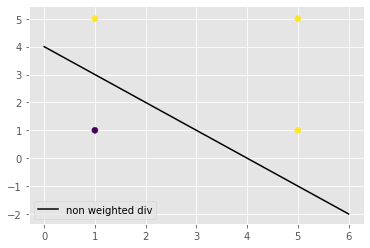

In [4]:
w = clf.coef_[0]
print(w) # weights, values of a and be of (ax+by+c=0)
a = -w[0] / w[1]
xx = np.linspace(0,6)
yy = a * xx - clf.intercept_[0] / w[1]

plt.plot(xx, yy, 'k-', label="non weighted div")
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend();plt.show()

## Iris

In [5]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=50, shuffle=True, random_state=1)

In [23]:
from sklearn.metrics import precision_score, recall_score, classification_report

In [11]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [27]:
print(classification_report(y_test, y_pred))
print("Precision score:")
print(precision_score(y_test, y_pred, average=None, labels=np.unique(y)))
print("Recall score:")
print(recall_score(y_test, y_pred, average=None, labels=np.unique(y)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.95      0.97        19
           2       0.93      1.00      0.97        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

Precision score:
[1.         1.         0.93333333]
Recall score:
[1.         0.94736842 1.        ]


In [28]:
from sklearn.model_selection import cross_validate, KFold

cross_validate(clf, X_test, y_test)

/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/homes/v18porti/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value 

{'fit_time': array([0.00124478, 0.00100446, 0.00122643]),
 'score_time': array([0.00063109, 0.00045657, 0.00052762]),
 'test_score': array([1.        , 1.        , 0.93333333])}

In [57]:
kf = KFold(n_splits=10, shuffle=False)
indexes = np.arange(start=0, stop=len(X), step=1)
indexes = np.random.permutation(indexes)
X_rand = X[indexes]
y_rand = y[indexes]

kf.get_n_splits(X_rand)

precision_scores = np.array([[]])
recall_scores = np.array([[]])

for train_index, test_index in kf.split(X_rand):
    X_train = X_rand[train_index]
    X_test = X_rand[test_index]
    y_train = y_rand[train_index]
    y_test = y_rand[test_index]
    precision = precision_score(y_test, y_pred, average=None, labels=np.unique(y))
    recall_score(y_test, y_pred, average=None, labels=np.unique(y))

(135, 4)
(15, 4)
(135, 4)
(15, 4)
(135, 4)
(15, 4)
(135, 4)
(15, 4)
(135, 4)
(15, 4)
(135, 4)
(15, 4)
(135, 4)
(15, 4)
(135, 4)
(15, 4)
(135, 4)
(15, 4)
(135, 4)
(15, 4)


In [35]:
a = np.array([1,2,3])


In [44]:
indexes = np.arange(start=0, stop=len(X), step=1)
indexes = np.random.permutation(indexes)

[ 39  66   8  61 104  29 125  57 130 128  43  13  48  15 141  30 126  71
  33  68  49  54  83  95  84 121  73  23 137  63  14  26  25  88  56 140
 149   6  70  82  97 142 139 133   0  53  35 148  78   1  40 134  67 106
 100  12  37  77  24  44  87  10 105 112  98   2  47  27  11 127  99  16
  46  89 144 120 143  74  28 111 129  91  85  65  92 146 114  62  80  20
 136  69  22  64  36   5  90 119 138 145  81 116  52  72 109 131 123 118
  86  60 135  42 132 110 107  75   4  96  45 103  93  59 108 124  38  50
  94  55  18  32  51 101  19 115  21 117 122  31  76 147 113   9   7  41
   3  17  58 102  34  79]


(150,)